Start with autoreload magic; this reloads modules automatically before entering the execution of code and thus enabled development in modules like util.py

In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import os
from glob import glob
from subprocess import check_call
import config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import util

In [50]:
droot = f"{config.project_tmpdir}/simulation-data/TM3-Jena"
os.makedirs(droot, exist_ok=True)
files = [
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_apojena_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_co2gridfed_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_co2oco2mip_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_co2cesm_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_co2somffn_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_n2cesm_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_n2era_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_o2gridfed_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_o2cesm_output1.vGV7.sGV7.tar.gz',
    'http://www.bgc-jena.mpg.de/~christian.roedenbeck/CarboScope/INVERSION/OUTPUT/OUTPUT14.004+tm3_ncep.1986-2020_fg.co2.vGV7.sGV7.FwdFile_BrittStephensAPO/PRI_o2gk01r16_output1.vGV7.sGV7.tar.gz',
]


directories = []
for f in files:
    gz_file = f'{droot}/{os.path.basename(f)}'
    tar_file = f'{droot}/{os.path.basename(f)}'.replace('.gz', '')
    final_dir = f'{tar_file}'.replace('.tar', '')

    directories.append(final_dir)

    if not os.path.exists(final_dir):
        if not os.path.exists(tar_file) and not os.path.exists(gz_file):
            print(final_dir)
            continue
            check_call(['wget', f], cwd=droot)

        if not os.path.exists(tar_file) and os.path.exists(gz_file):
            check_call(['gunzip', gz_file], cwd=droot)

        assert os.path.exists(tar_file)
        check_call(['tar', '-xvf', tar_file], cwd=droot)


copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_surface_models.html

		# encode CarboScope file names
		if(meth=='insitu'){ let1='H' }else if(meth=='flask'){ let1='F' } # First big letter: F = Flask (discrete sampling events), H = Continuous (original hourly, half-hourly, etc.)
		if(type=='surface'){ # Second small letter: Platform / station class
			let2='b' 
			if(sta=='HBA'|sta=='SYO'|sta=='MAA'|sta=='PSA'|sta=='MQA'|sta=='CRZ'|sta=='CGO'|sta=='AMS') let2='r'
			if(sta=='CYA'|sta=='BHD'|sta=='CPT') let2='s'
		}else if(type=='shipboard'){ 
			let2='o' 
		} 
		# Capital letters (or numbers): STATION CODE 
		if(lab=='NOAA'){ # First small letter after station code: Measuring institution
			labcode='c' 
		} else if(lab=='CSIRO'){ 
			labcode='a'
		} else if(lab=='SIO_CDK'){ 
			labcode='k'
		} else if(lab=='SIO_O2'){ 
			labcode='s'
		} else if(lab=='LSCE'){ 
			labcode='l'
		} else if(lab=='TU'|lab=='NIWA'|lab=='SAWS'){ 
			labcode='x'
		} 
		filename=paste(let1,let2,sta,labcode,'o.co2.ts',sep='') # Second small letter after station code (if any): Source data base # o	ObsPack (GLOBALVIEW+)
		stadatin=read.table(paste(modobspackdir,'/simulated-obs',subdir,'/',filename,sep=''))
		names(stadatin)=c('date','year','mon','day','hour','min','sec','lat','lon','hgt','obs','sigma','co2')
		if(filename=='FbSPOko.co2.ts') stadatin=stadatin[stadatin$year>1956,] # first 10 values repeated
		stadat=stadatin[,c(1:7,13)]

and copying from:
https://ncar.github.io/so-co2-airborne-obs/_prestage-obs/process_aircraft_models.html



} else if(substr(model,1,10)=='CarboScope'){

	orcdatin=read.table(paste(modobspackdir,'/simulated-obs',subdir,'/HaORCMERGE10xo.co2.ts',sep=''))
	orcdat=orcdatin[,c(2:7,10,8,9,13)] ; colnames(orcdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2')

	tomdatin=read.table(paste(modobspackdir,'/simulated-obs',subdir,'/HaTOMco.co2.ts',sep=''))
	tomdat=tomdatin[,c(2:7,10,8,9,13)] ; colnames(tomdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2')

	hipdatin=read.table(paste(modobspackdir,'/simulated-obs',subdir,'/HaHIPxo.co2.ts',sep=''))
	hipdat=hipdatin[,c(2:7,10,8,9,13)] ; colnames(hipdat)=c('year','mon','day','hour','min','sec','alt','lat','lon','co2')

	# need to get obspack_id from row matching obs obspack
	obsobspackdir=paste(project_tmpdir_obs,'/',gvp42dir,sep='') # read in actual data files from same GV+ version, then swap in from single CAMS file
	orcnc=nc_open(paste(obsobspackdir,'/co2_orc_aircraft-insitu_3_allvalid-merge10.nc',sep=''))
	orcdat$obspack_id=ncvar_get(orcnc,'obspack_id')
	hipnc=nc_open(paste(obsobspackdir,'/co2_hip_aircraft-insitu_59_allvalid.nc',sep=''))
	hipdat$obspack_id=ncvar_get(hipnc,'obspack_id')
	obsobspackdir=paste(project_tmpdir_obs,'/',atom40dir,sep='') # ATom file using ATom_v4.0 obspack
	tomnc=nc_open(paste(obsobspackdir,'/co2_tom_aircraft-insitu_1_allvalid.nc',sep=''))
	tomdat$obspack_id=ncvar_get(tomnc,'obspack_id')

(note, obsobspackdir should point to GV+ 7.0 now)
    

### Contribution details
- 10 subdirectories, one each corresponding to requested tracers
- within each of which are 506 records (ObsPack 7.0 has 524 records), each with timeseries (.ts), daily mean (.dmm.ts), and monthly mean (.mm.ts) files 
- CarboScope specific file naming convention (see below)
- Example first three lines (includes 10 requested tracers, plus ACTM and Obs):

 2006.432671 2006  6  7 22 11 47   40.10  -88.55  -4548   383.950       3.07354       346.2692304253578
 
 2006.432702 2006  6  7 22 28 22   40.10  -88.55  -3591   384.370       3.07354       346.2603015899658
 
 2006.432727 2006  6  7 22 41 24   40.10  -88.55  -2960   382.420       3.07354       346.8185317069292

In [51]:
# not using at the moment:
def parse_filename(name: str):

    # first letter
    method_def = {"H": "insitu", "F": "flask"}
    assert name[0] in method_def, f"method: unknown code: {name}"

    # second letter
    type_def = {
        'a': 'Aircraft',
        'b': 'Surface, baseline',
        'c': 'Surface, complex',
        'm': 'Surface high mountain',
        'o': 'Ocean shipboard	Moving',
        'r': 'Surface, remote (e.g. islands)',
        's': 'Surface, complex circulation',
        't': 'Tall tower',
        'u': 'Urban',
    }
    assert name[1] in type_def, f"type: unknown code: {name}"

    # capital letters, station code
    station = ""
    for n in range(2, len(name)):
        c = name[n]
        if c.isupper() or c.isnumeric() or c in ["_"]:
            station += c
        else:
            break

    labcode_def = {
        'a': 'CSIRO',
        'b': 'MPI-BGC',
        'c': 'NOAA',
        'd': 'DWD',
        'e': 'UBern',
        'g': 'AGAGE',
        'j': 'JMA',
        'k': 'SIO (CO2 program)',
        'l': 'LSCE',
        'm': 'EC (formerly MSC)',
        'n': 'NIES',
        'p': 'PU',
        'r': 'RUG',
        's': 'SIO (O2 program)',
        't': 'MRI Tsukuba',
        'u': 'UBA',
        'v': 'Voeikov Main Geophysical Observatory',
        'x': 'all others',
    }
    assert name[n] in labcode_def, f"lab: unknown code: {name}"

    # need to add?
    # Second small letter after station code (if any): Source data base # o	ObsPack (GLOBALVIEW+)
    # e.g. FrCBAco.co2.ts
    
    attrs = {
        "method": method_def[name[0]],
        "type": type_def[name[1]],
        "station": station,
        'institution': labcode_def[name[n]],
    }
    return attrs


for dirin in directories:
    files = sorted(glob(f"{dirin}/*o.co2.ts"))

    for f in files:
        basename = os.path.basename(f)
        attrs = parse_filename(basename)


In [52]:
# need the reverse of prior cell:
#def create_filename(method, type, station, institution)
# return filename

# for now, hard code Scripps flask CBA and PSA
filename1 = 'FrCBAso.co2.ts'
filename2 = 'FrPSAso.co2.ts'

In [57]:
droot = f"{config.project_tmpdir}/simulation-data/TM3-Jena"

# should parse tracer names out of file names above, hard coding here
tracers = [
    'apojena', 'co2cesm', 'co2gridfed', 'co2oco2mip', 'co2somffn', 
    'n2cesm', 'n2era', 'o2cesm', 'o2gk01r16', 'o2gridfed'
]

dtracer = f"PRI_{tracers[0]}_output1.vGV7.sGV7"
path = f"{droot}/{dtracer}/{filename1}"
print(path)
df = pd.read_csv(path, delim_whitespace=True, header=0) # , na_values=-599.0000)
df.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', tracers[0]] 
    
for t in tracers[1:]:
    
    dtracer = f"PRI_{t}_output1.vGV7.sGV7"
    path = f"{droot}/{dtracer}/{filename1}"

# 1995.624258 1995  8 16 20 30  0   55.21 -162.72     31   351.705       1.04403       347.1162735968828
# 1995.627454 1995  8 18  0 30  0   55.21 -162.72     31   349.695       1.04403       347.1164677590132
    print(path)
    
    tmp = pd.read_csv(path, delim_whitespace=True, header=0) # , na_values=-599.0000)
    tmp.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', t] 
    df[t] = tmp[t]
    
df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df = df.set_index('time')
df = df.dropna()
df = df.rename({'apojena': 'apo_jena', 'co2cesm': 'co2_cesm', 'co2gridfed': 'co2_gridfed', 'co2oco2mip': 'co2_oco2mip', 'co2somffn': 'co2_somffn', 
    'n2cesm': 'n2_cesm', 'n2era': 'n2_era', 'o2cesm': 'o2_cesm', 'o2gk01r16': 'o2_gk01r16', 'o2gridfed': 'o2_gridfed'}, axis=1)

# cutting and pasting here - need to make station dynamic:
dtracer = f"PRI_{tracers[0]}_output1.vGV7.sGV7"
path = f"{droot}/{dtracer}/{filename2}"
print(path)
df2 = pd.read_csv(path, delim_whitespace=True, header=0) # , na_values=-599.0000)
df2.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', tracers[0]] 
    
for t in tracers[1:]:
    
    dtracer = f"PRI_{t}_output1.vGV7.sGV7"
    path = f"{droot}/{dtracer}/{filename2}"

    print(path)
    
    tmp = pd.read_csv(path, delim_whitespace=True, header=0) # , na_values=-599.0000)
    tmp.columns = ['year.frac', 'year', 'month', 'day', 'hour', 'minute', 'second', 'lat', 'lon', 'hgt', 'obs', 'sigma', t] 
    df2[t] = tmp[t]
    
df2['time'] = pd.to_datetime(df2[['year', 'month', 'day', 'hour', 'minute']])
df2 = df2.set_index('time')
df2 = df2.dropna()
df2 = df2.rename({'apojena': 'apo_jena', 'co2cesm': 'co2_cesm', 'co2gridfed': 'co2_gridfed', 'co2oco2mip': 'co2_oco2mip', 'co2somffn': 'co2_somffn', 
    'n2cesm': 'n2_cesm', 'n2era': 'n2_era', 'o2cesm': 'o2_cesm', 'o2gk01r16': 'o2_gk01r16', 'o2gridfed': 'o2_gridfed'}, axis=1)

/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_apojena_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2gridfed_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2oco2mip_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_co2somffn_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_n2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_n2era_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_o2cesm_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena/PRI_o2gk01r16_output1.vGV7.sGV7/FrCBAso.co2.ts
/glade/work/stephens/sno-analysis/simulation-data/TM3-Jena

In [58]:
# add derived APO variables

df['apo_cesm'] = util.compute_apo (
    o2=df['o2_cesm'],
    co2=df['co2_cesm'],
    n2=df['n2_cesm']
)

df['apo_diss'] = util.compute_apo (
    o2=df['o2_gk01r16'],
    co2=df['co2_somffn'],
    n2=df['n2_era']
)

df['apo_gridfed'] = util.compute_apo (
    o2=df['o2_gridfed'],
    co2=df['co2_gridfed'],
    n2=0.0
)

df['apo_oco2mip'] = util.compute_apo (
    o2=df['co2_oco2mip'] * -1.4,
    co2=df['co2_oco2mip'],
    n2=0.0
)

# kluge - need to make station name dynamic and allow any number of stations
df2['apo_cesm'] = util.compute_apo (
    o2=df2['o2_cesm'],
    co2=df2['co2_cesm'],
    n2=df2['n2_cesm']
)

df2['apo_diss'] = util.compute_apo (
    o2=df2['o2_gk01r16'],
    co2=df2['co2_somffn'],
    n2=df2['n2_era']
)

df2['apo_gridfed'] = util.compute_apo (
    o2=df2['o2_gridfed'],
    co2=df2['co2_gridfed'],
    n2=0.0
)

df2['apo_oco2mip'] = util.compute_apo (
    o2=df2['co2_oco2mip'] * -1.4,
    co2=df2['co2_oco2mip'],
    n2=0.0
)

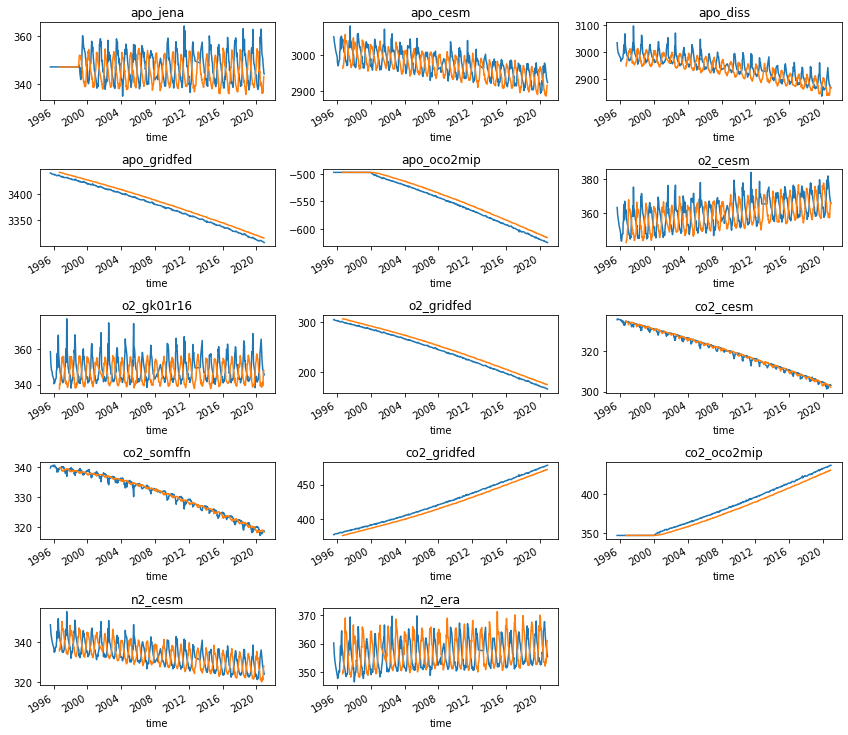

In [82]:
sno_vars = [
    'apo_jena',
    'apo_cesm',
    'apo_diss',
    'apo_gridfed',
    'apo_oco2mip',
    'o2_cesm', 
    'o2_gk01r16',  
    'o2_gridfed',   
    'co2_cesm', 
    'co2_somffn', 
    'co2_gridfed', 
    'co2_oco2mip', 
    'n2_cesm', 
    'n2_era', 
]

n_plots = len(sno_vars)
ncol = int(np.sqrt(n_plots))
nrow = int(((n_plots / ncol) + n_plots % ncol))
fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    df[v].plot(ax=ax)
    df2[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()

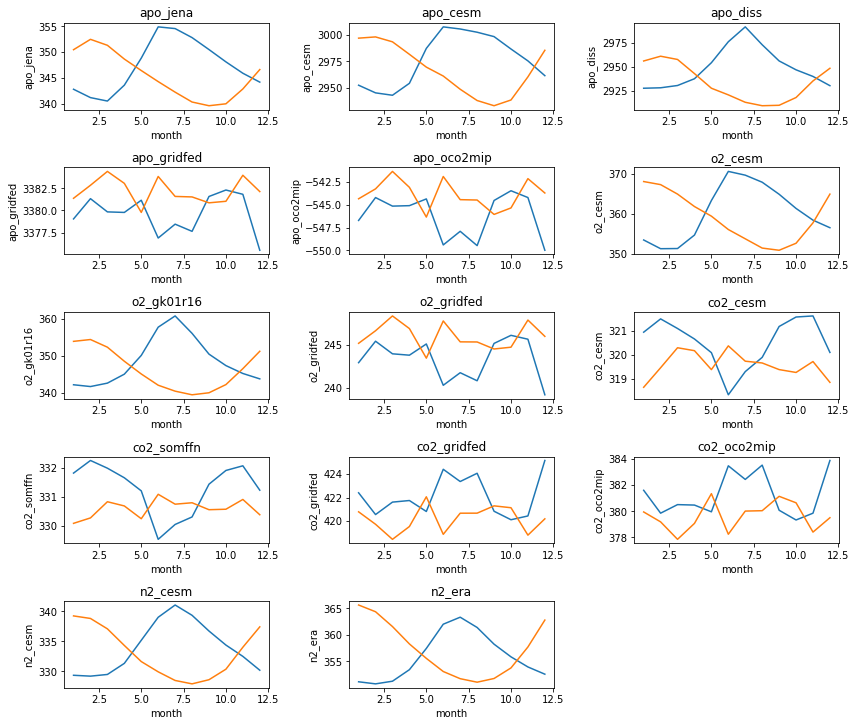

In [81]:
# seasonal climatology
ds = df.to_xarray()
ds_seas=ds.groupby('time.month').mean('time')
ds_seas['apo_cesm']

# kluge - need to make station name dynamic and allow any number of stations
ds2 = df2.to_xarray()
ds2_seas=ds2.groupby('time.month').mean('time')
ds2_seas['apo_cesm']

fig, axs = plt.subplots(nrow, ncol, figsize=(12, 12), squeeze=False)

for n, v in enumerate(sno_vars):
    ip, jp = np.unravel_index(n, axs.shape)
    
    ax = axs[ip, jp]
    ds_seas[v].plot(ax=ax)
    ds2_seas[v].plot(ax=ax)
    ax.set_title(v)

plt.tight_layout();    

for n in range(n+1, nrow*ncol):
    ip, jp = np.unravel_index(n, (nrow, ncol))
    axs[ip, jp].remove()
    